In [1]:
# Parameters
name = "2020-01-01-till-2021-02-28-tycho-brahe"
n_rows = None


# Exploratory data analysis (EDA) : trip statistics

# Purpose
Some statistics have been generated for each trip. This will be explored in this notebook, to find some possible patterns in the data.

# Methodology
* Load the statistics.
* Descriptive statistics.
* Make some nice seaborn plots
* Generate heat map.

# Setup

In [27]:
# %load imports.py
#%load imports.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
width=20
height=3
plt.rcParams["figure.figsize"] = (width,height)
sns.set(rc={'figure.figsize':(width,height)})

#import seaborn as sns
import os
from collections import OrderedDict

from IPython.display import display

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

import folium
import plotly.express as px
import plotly.graph_objects as go

import sys
import os
sys.path.append('../')
from src.visualization import visualize
import scipy.integrate

sys.path.append('../../../../../src/models/pipelines/longterm/scripts/prepdata/trip_statistics')
import trip_statistics


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
df_stat = trip_statistics.load_output_as_pandas_dataframe('id_statistics.parquet')
df_stat

latitude  longitude     heading  power_em_thruster_1  \
trip_no                                                          
1.0      56.037954  12.657033   66.737998           414.949513   
2.0      56.034732  12.654767  259.289806           371.334951   
3.0      56.037121  12.657407   66.003030           384.353535   
4.0      56.035049  12.653717  260.582487           493.094571   
5.0      56.037667  12.658731   66.705934           408.187609   
...            ...        ...         ...                  ...   
8272.0   56.036820  12.656959   78.390784           386.820844   
8273.0   56.038875  12.652172  249.453563           334.478465   
8274.0   56.037579  12.657079   78.466923           358.664957   
8275.0   56.036159  12.653037  248.523145           280.786290   
8276.0   56.037431  12.655617   78.668508           373.163904   

         power_em_thruster_2  power_em_thruster_3  power_em_thruster_4  \
trip_no                                                                  
1.0               445.467671           360.205492           355.449956   
2.0               398.771845           402.959547           384.335761   
3.0               403.802571           356.265381           348.166208   
4.0               522.021016           496.622592           468.592820   
5.0               436.029668           358.720768           348.050611   
...                      ...                  ...                  ...   
8272.0            420.207580           317.725237           324.122308   
8273.0            346.916993           298.830854           294.047768   
8274.0            379.011966           248.537607           253.298291   
8275.0            285.646774           330.363710           320.646774   
8276.0            397.951197           293.953959           297.302026   

         power_em_thruster_total         cog   sin_pm1   sin_pm2   sin_pm3  \
trip_no                                                                      
1.0                  1576.072631   72.063481 -0.018140  0.014034 -0.211319   
2.0                  1557.402104  254.945688  0.091474  0.168342  0.084861   
3.0                  1492.587695   72.778990  0.006538  0.041393 -0.123441   
4.0                  1980.330998  255.338827  0.021302  0.097969  0.098880   
5.0                  1550.988656   72.043185  0.009410  0.043116 -0.013878   
...                          ...         ...       ...       ...       ...   
8272.0               1448.875969   73.378630 -0.080293 -0.051775 -0.086083   
8273.0               1274.274080  254.492365 -0.074485 -0.006116 -0.008866   
8274.0               1239.512821   73.357752 -0.058587 -0.029782 -0.122590   
8275.0               1217.443548  254.155750 -0.020405  0.056893 -0.006653   
8276.0               1362.371087   73.636878 -0.044119 -0.015373 -0.079746   

          sin_pm4   cos_pm1   cos_pm2   cos_pm3   cos_pm4  power_heeling  \
trip_no                                                                    
1.0     -0.166250 -0.672925 -0.675743 -0.809043 -0.803045       3.197520   
2.0      0.074851  0.777466  0.791547  0.676049  0.679201       0.851133   
3.0     -0.077197 -0.711043 -0.712979 -0.758449 -0.755415       2.035813   
4.0      0.087748  0.720291  0.731599  0.716466  0.718973       4.789842   
5.0      0.039514 -0.657692 -0.658992 -0.696761 -0.695680       5.315009   
...           ...       ...       ...       ...       ...            ...   
8272.0  -0.019251 -0.694239 -0.697245 -0.711766 -0.710398       7.670973   
8273.0  -0.025140  0.778077  0.783790  0.784790  0.787485       4.117463   
8274.0  -0.068407 -0.707941 -0.711376 -0.800391 -0.797749       6.395726   
8275.0  -0.019267  0.746051  0.754660  0.767115  0.770922       4.585484   
8276.0  -0.021741 -0.786050 -0.787628 -0.796241 -0.796014       6.229282   

              sog  trip_no   trip_time  reversing  trip_direction  \
trip_no                                                             
1.0      4.410812      1.0  564.010629        

In [29]:
df_stat.shape

(8276, 25)

In [30]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8276 entries, 1.0 to 8276.0
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   latitude                 8276 non-null   float64            
 1   longitude                8276 non-null   float64            
 2   heading                  8276 non-null   float64            
 3   power_em_thruster_1      8276 non-null   float64            
 4   power_em_thruster_2      8276 non-null   float64            
 5   power_em_thruster_3      8276 non-null   float64            
 6   power_em_thruster_4      8276 non-null   float64            
 7   power_em_thruster_total  8276 non-null   float64            
 8   cog                      8276 non-null   float64            
 9   sin_pm1                  8276 non-null   float64            
 10  sin_pm2                  8276 non-null   float64            
 11  sin_pm3                 

In [31]:
df_stat.describe()

latitude    longitude      heading  power_em_thruster_1  \
count  8276.000000  8276.000000  8276.000000          8276.000000   
mean     56.036849    12.655974   164.495239           395.256488   
std       0.001653     0.006824    88.928122            95.119869   
min      56.032610    12.617190    58.467020             0.000000   
25%      56.035638    12.653829    76.796351           341.992152   
50%      56.036975    12.656305    86.632184           399.108419   
75%      56.037851    12.657571   252.634959           456.820998   
max      56.043610    12.691150   269.260619           978.333333   

       power_em_thruster_2  power_em_thruster_3  power_em_thruster_4  \
count          8276.000000          8276.000000          8276.000000   
mean            422.074598           370.818657           359.950040   
std             102.821931           102.182772            92.695546   
min               0.000000             0.000000             0.000000   
25%             362.194419           311.341696           306.837693   
50%             427.642053           375.393853           365.420133   
75%             489.413787           438.528774           420.368316   
max            1059.232356           879.164640           835.109448   

       power_em_thruster_total          cog      sin_pm1      sin_pm2  \
count              8276.000000  8276.000000  8276.000000  8276.000000   
mean               1548.099783   163.487688    -0.026295     0.022619   
std                 357.583160    90.613071     0.182779     0.183137   
min                   0.000000    23.310000    -0.998050    -1.000000   
25%                1348.364672    73.526981    -0.083271    -0.039196   
50%                1568.942715    77.266900    -0.031932     0.018177   
75%                1775.450597   254.612399     0.016892     0.068410   
max                3486.773620   316.720000     0.989780     0.999970   

           sin_pm3      sin_pm4      cos_pm1      cos_pm2      cos_pm3  \
count  8276.000000  8276.000000  8276.000000  8276.000000  8276.000000   
mean     -0.003412     0.014096     0.034031     0.036329     0.011143   
std       0.192583     0.188601     0.713778     0.718916     0.728001   
min      -0.999970    -1.000000    -0.997971    -0.999918    -0.993153   
25%      -0.084692    -0.058090    -0.681642    -0.684718    -0.722222   
50%      -0.000299     0.010553     0.014655     0.006470     0.004245   
75%       0.054929     0.067952     0.759264     0.767404     0.746381   
max       1.000000     0.999970     0.976560     0.987745     0.918569   

           cos_pm4  power_heeling          sog      trip_no    trip_time  \
count  8276.000000    8276.000000  8276.000000  8276.000000  8276.000000   
mean      0.012590       2.136825     4.086473  4138.500000   569.551670   
std       0.729449       4.746975     0.746913  2389.219747   109.874341   
min      -0.996954      -0.083333     0.200633     1.000000     0.000000   
25%      -0.722061       0.313100     4.020523  2069.750000   556.500000   
50%       0.015910       1.430573     4.219324  4138.500000   582.500000   
75%       0.749795       2.830899     4.388313  6207.250000   611.511029   
max       0.993410     138.500000     5.364258  8276.000000   902.000554   

         reversing  trip_direction  
count  8276.000000     8276.000000  
mean      0.497583        0.503383  
std       0.500024        0.500019  
min       0.000000        0.000000  
25%       0.000000        0.000000  
50%       0.000000        1.000000  
75%       1.000000        1.000000  
max       1.000000        1.000000

In [32]:
df_stat['trip_direction'].unique()

array([0, 1], dtype=int64)

Some data is missing, so that the trip_direction always has the sequence:0,1,0,... cannot be taken for granted:

In [41]:
(df_stat['trip_direction'].diff() != 0).all()

False

## Time and direction matter

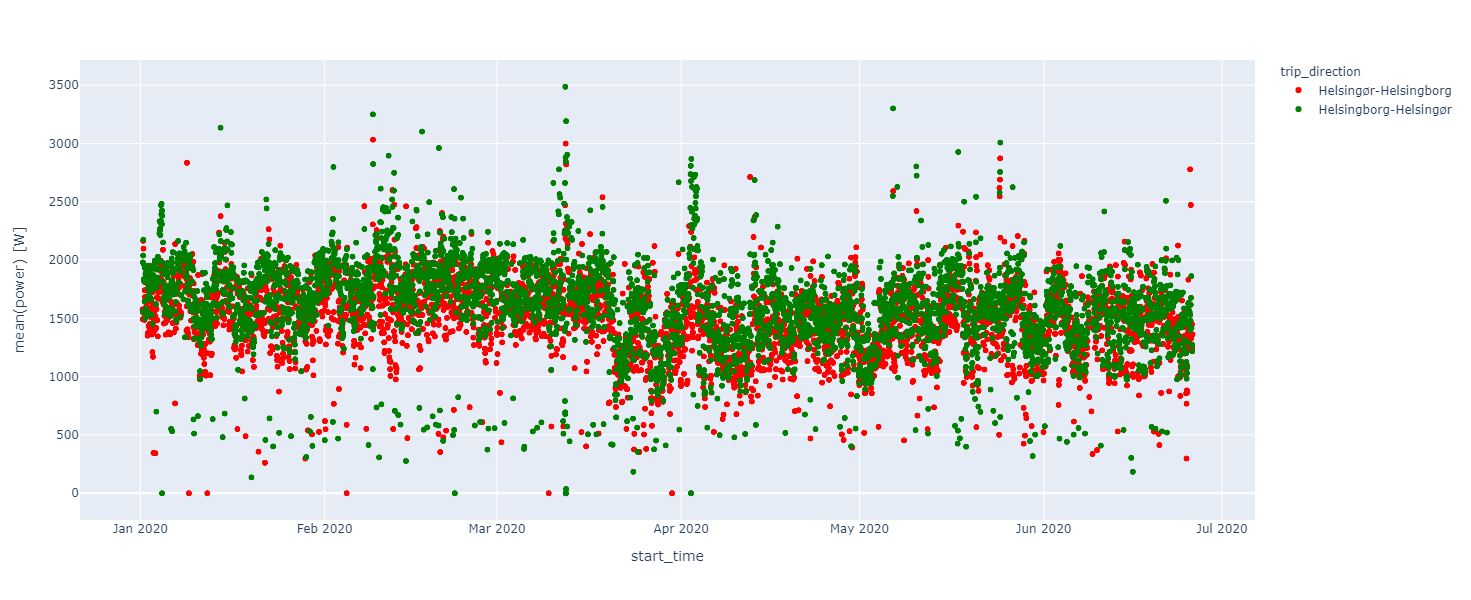

In [88]:
df_stat_plot = df_stat.copy()

df_stat_plot['mean(power) [W]'] = df_stat_plot['power_em_thruster_total']

df_stat_plot['trip_direction'] = df_stat_plot['trip_direction'].apply(lambda x : 'Helsingør-Helsingborg' if x==0 else 'Helsingborg-Helsingør')

fig = px.scatter(df_stat_plot, x='start_time',y='mean(power) [W]', color='trip_direction', width=1500, height=600, 
                color_discrete_sequence=['red','green'])
fig.show()

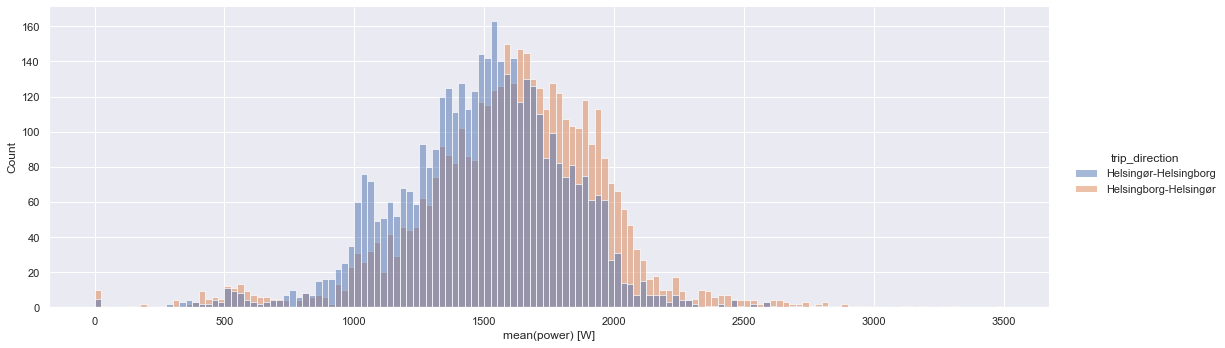

In [89]:
sns.displot(df_stat_plot, x='mean(power) [W]', hue='trip_direction', binwidth=25, aspect=3)

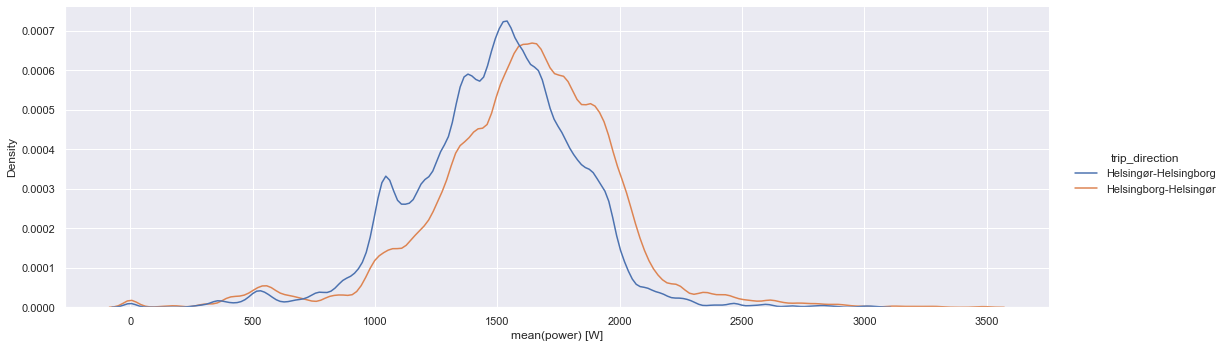

In [90]:
sns.displot(df_stat_plot, x='mean(power) [W]', hue='trip_direction', kind="kde", bw_adjust=.4, aspect=3)

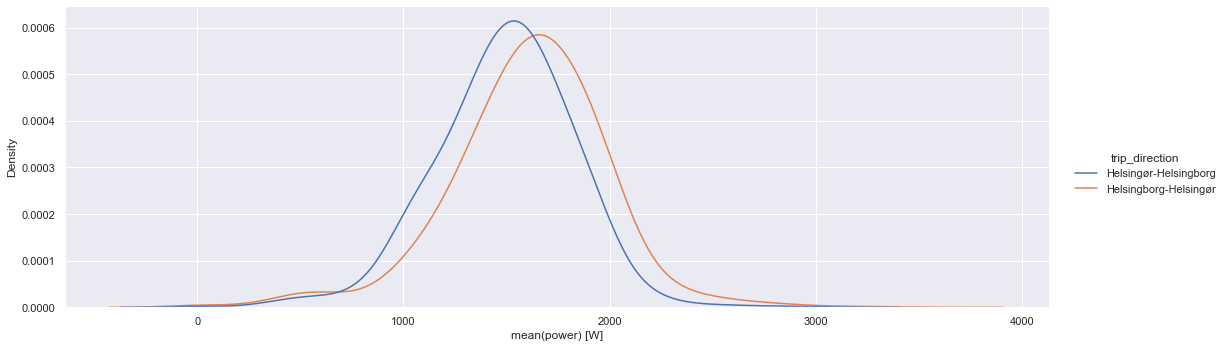

In [94]:
sns.displot(df_stat_plot, x='mean(power) [W]', hue='trip_direction', kind="kde", bw_adjust=2, aspect=3)

## Outliers

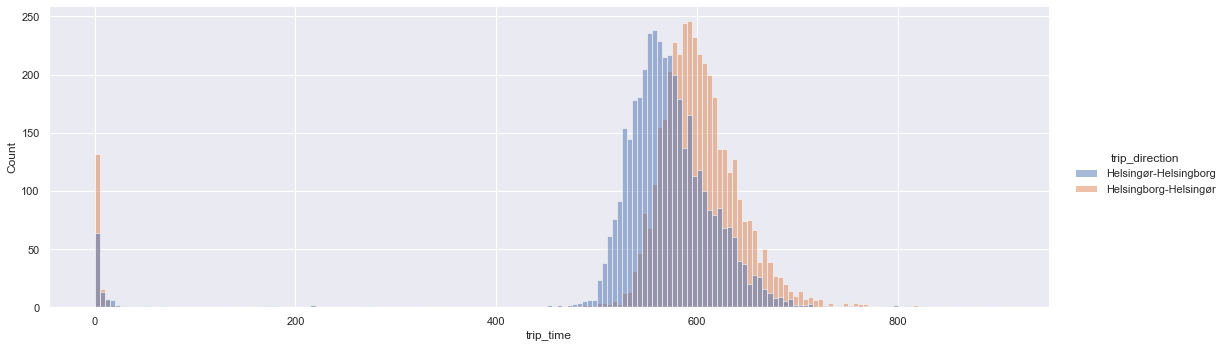

In [122]:
sns.displot(df_stat_plot, x='trip_time', hue='trip_direction', binwidth=5, aspect=3)

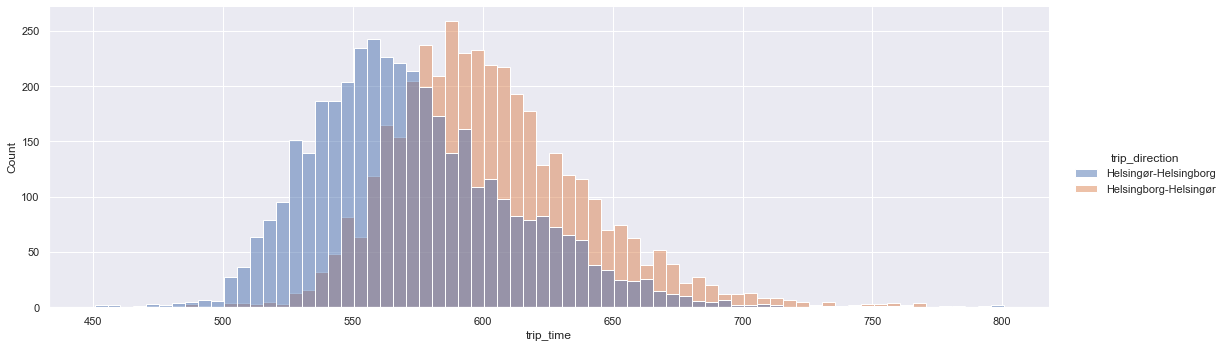

In [125]:
mask = df_stat_plot['trip_time'] > 400
df_cleaned = df_stat_plot.loc[mask].copy()
mask = df_stat_plot['trip_time'] < df_stat_plot['trip_time'].quantile(0.999)
df_cleaned = df_cleaned.loc[mask].copy()

sns.displot(df_cleaned, x='trip_time', hue='trip_direction', binwidth=5, aspect=3)

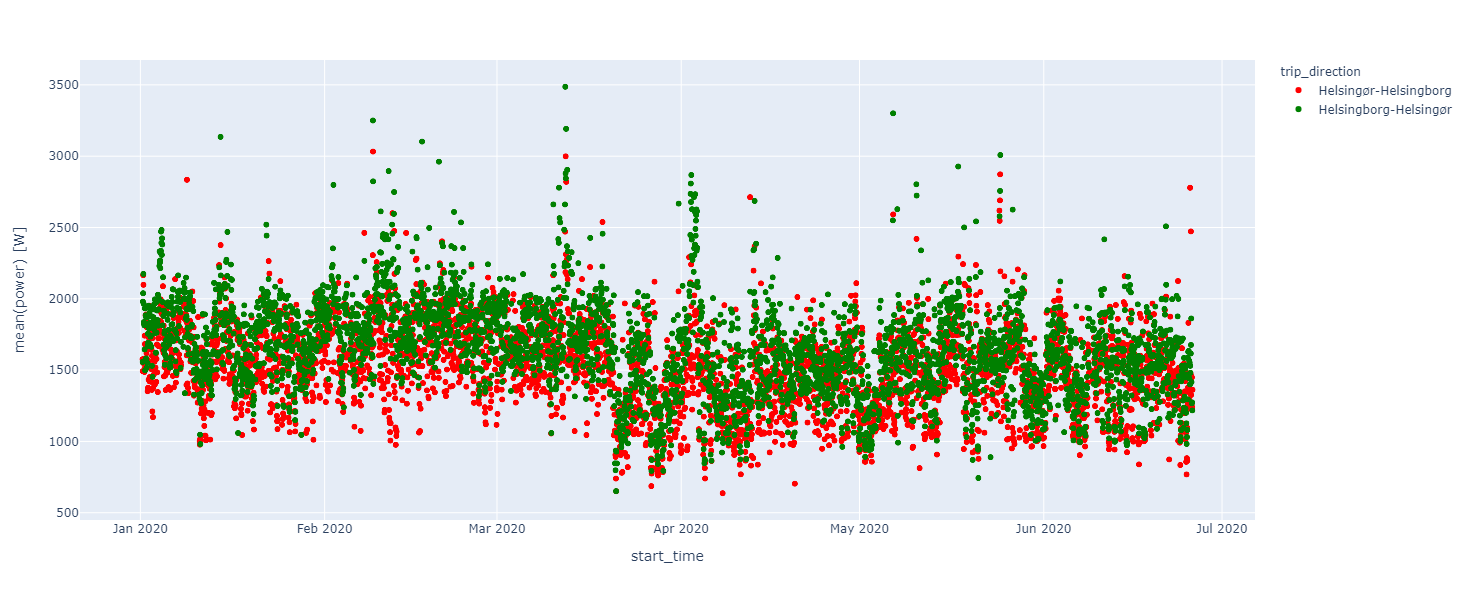

In [132]:
fig = px.scatter(df_cleaned, x='start_time',y='mean(power) [W]', color='trip_direction', width=1500, height=600, 
                color_discrete_sequence=['red','green'])
fig.show()

In [126]:
df = df_cleaned.groupby('trip_direction').get_group('Helsingborg-Helsingør')

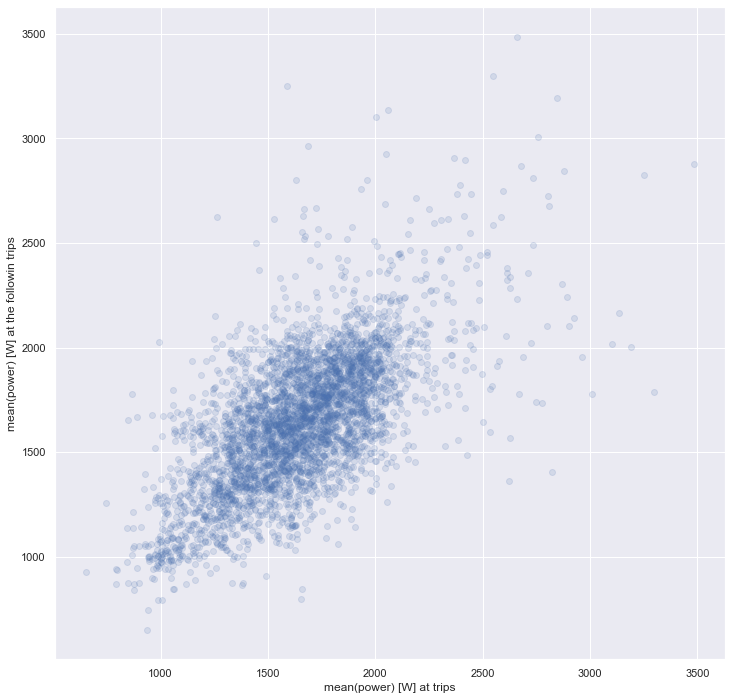

In [127]:
df1 = df.iloc[0:-1]
df2 = df.iloc[1:]

fig,ax=plt.subplots()
fig.set_size_inches(12,12)
ax.plot(df1['mean(power) [W]'], df2['mean(power) [W]'], 'o', alpha=0.15)
ax.set_xlabel('mean(power) [W] at trips')
ax.set_ylabel('mean(power) [W] at the followin trips');



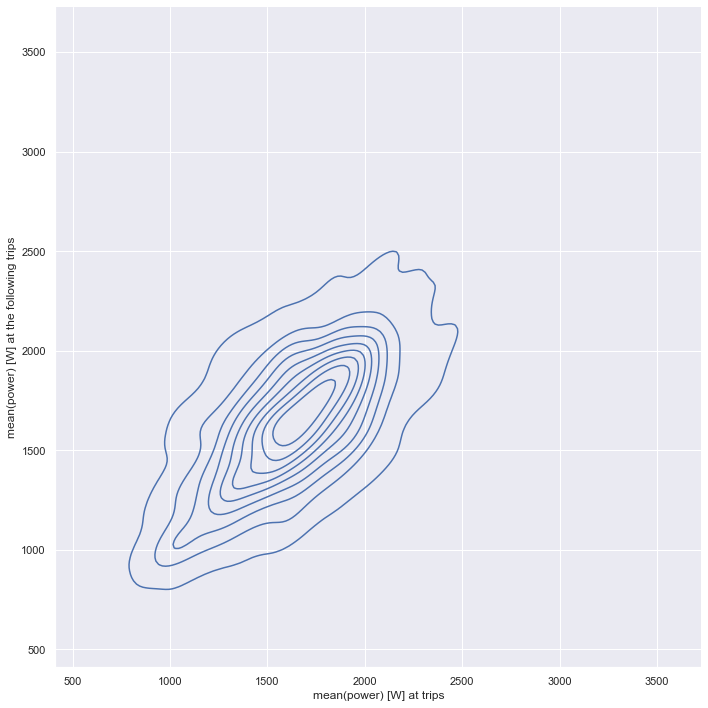

In [128]:
df_energy_following = pd.DataFrame(index=df1.index)
df_energy_following['mean(power) [W] at trips'] = df1['mean(power) [W]'].values.copy()
df_energy_following['mean(power) [W] at the following trips'] = df2['mean(power) [W]'].values.copy()

sns.displot(
    data=df_energy_following,
    x='mean(power) [W] at trips', y='mean(power) [W] at the following trips',
    kind="kde", height=10
)

In [129]:
df = df_cleaned.groupby('trip_direction').get_group('Helsingør-Helsingborg')

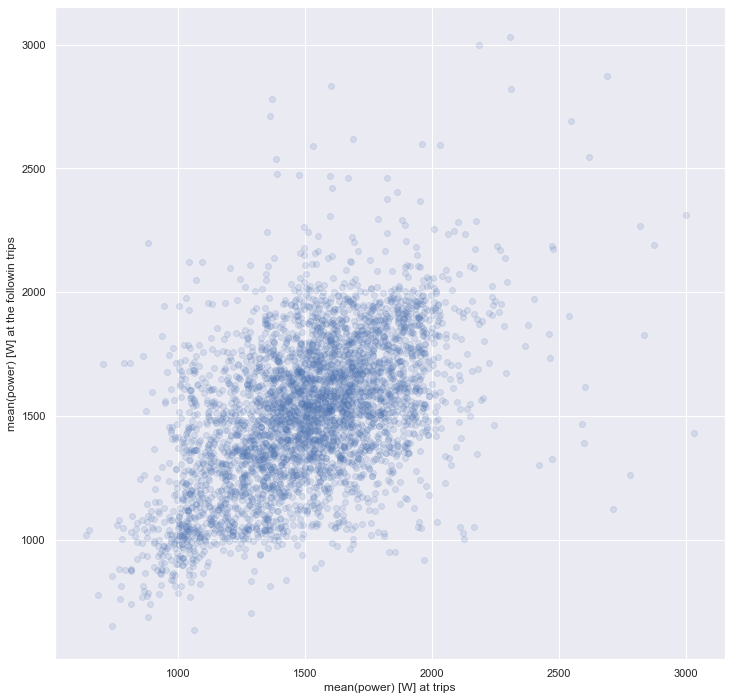

In [130]:
df1 = df.iloc[0:-1]
df2 = df.iloc[1:]

fig,ax=plt.subplots()
fig.set_size_inches(12,12)
ax.plot(df1['mean(power) [W]'], df2['mean(power) [W]'], 'o', alpha=0.15)
ax.set_xlabel('mean(power) [W] at trips')
ax.set_ylabel('mean(power) [W] at the followin trips');



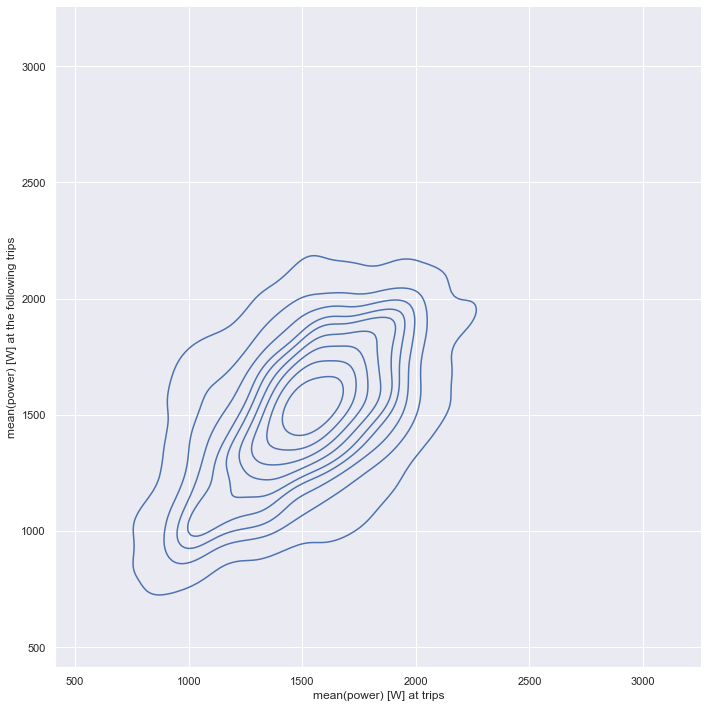

In [131]:
df_energy_following = pd.DataFrame(index=df1.index)
df_energy_following['mean(power) [W] at trips'] = df1['mean(power) [W]'].values.copy()
df_energy_following['mean(power) [W] at the following trips'] = df2['mean(power) [W]'].values.copy()

sns.displot(
    data=df_energy_following,
    x='mean(power) [W] at trips', y='mean(power) [W] at the following trips',
    kind="kde", height=10
)

## Heat map

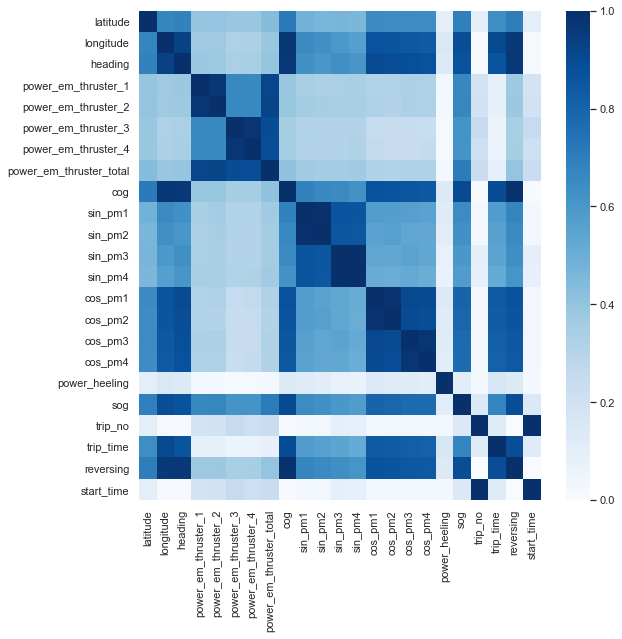

In [82]:
df = df_stat.groupby(by='trip_direction').get_group(0).copy()
df.drop(columns=['end_time','trip_direction'], inplace=True)
df['start_time'] = pd.TimedeltaIndex(df['start_time'] - df.iloc[0]['start_time']).total_seconds()

corr = df.corr().abs()

ax = sns.heatmap(corr, vmin=0, vmax=1, yticklabels=corr.index, cmap='Blues')
fig = ax.get_figure()
fig.set_size_inches(9,9)

In [83]:
corr_power = corr.loc['power_em_thruster_total'].sort_values(ascending=False).iloc[1:].copy()
corr_power

power_em_thruster_2    0.924275
power_em_thruster_1    0.920677
power_em_thruster_3    0.890779
power_em_thruster_4    0.889686
sog                    0.708408
latitude               0.433330
cog                    0.409796
reversing              0.398977
heading                0.396878
longitude              0.387983
sin_pm1                0.367499
sin_pm4                0.363494
sin_pm2                0.357765
sin_pm3                0.357669
cos_pm1                0.319908
cos_pm3                0.319849
cos_pm4                0.318711
cos_pm2                0.311851
trip_no                0.231628
start_time             0.230849
trip_time              0.084264
power_heeling          0.024439
Name: power_em_thruster_total, dtype: float64

In [84]:
mask = corr_power > 0.35
corr_power_important = corr_power[mask].copy()
corr_power_important

power_em_thruster_2    0.924275
power_em_thruster_1    0.920677
power_em_thruster_3    0.890779
power_em_thruster_4    0.889686
sog                    0.708408
latitude               0.433330
cog                    0.409796
reversing              0.398977
heading                0.396878
longitude              0.387983
sin_pm1                0.367499
sin_pm4                0.363494
sin_pm2                0.357765
sin_pm3                0.357669
Name: power_em_thruster_total, dtype: float64

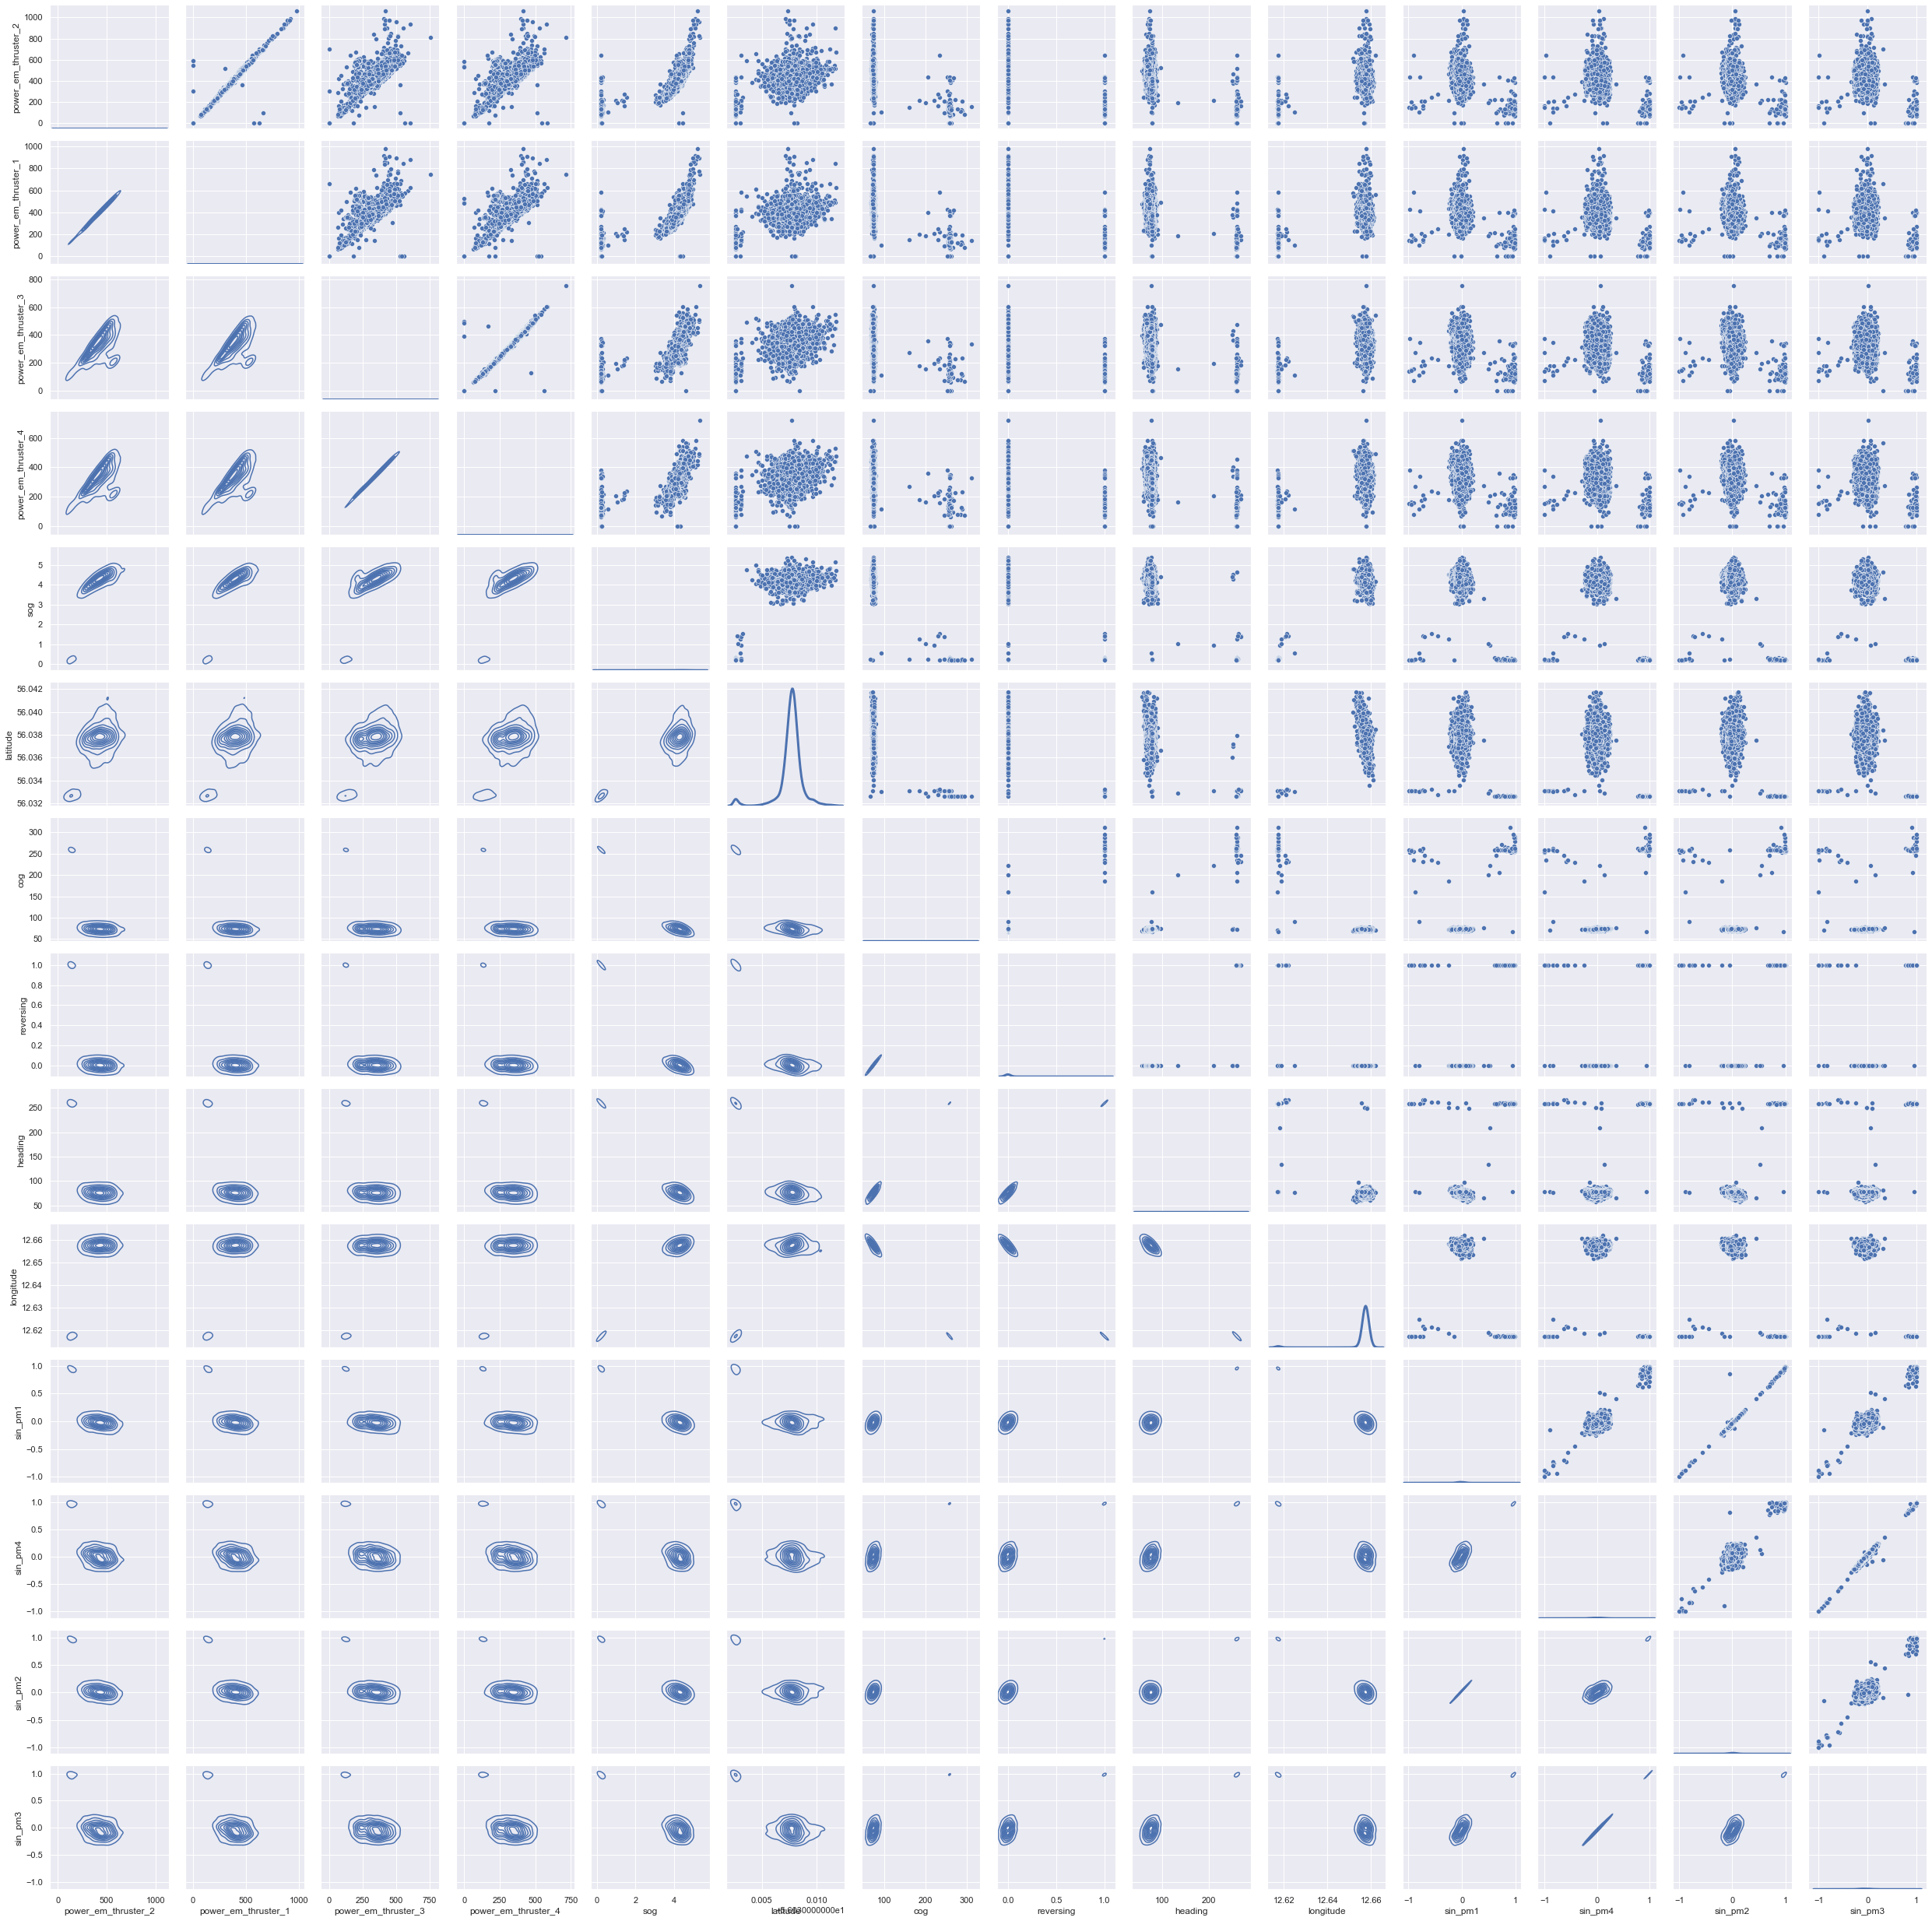

In [85]:
g = sns.PairGrid(df[corr_power_important.index])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)